In [1]:
from model.integration import integrate_p_func
from model.tabulation import save_tabulated_func
from scipy.integrate import simps
from model import data

In [2]:
name = 'ρ(w)'

### Возьмем сетку шагов следующих размеров:

In [3]:
steps = [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125]

### Функция integrate_p_func из модуля model.integration использует метод Симпсона:

Для одного отрезка используется следующая формула:
<img src="tests/simple_simpson.png">
Когда мы разбиваем наш отрезок на n промежутков можно воспользоваться:
<img src="tests/simpson.png">

### Для примера будем интегрировать функцию на отрезке [0, 2]

In [4]:
def integrate(func: str, steps: list, x0=0, x1=2) -> list:
    print('integrate {}...'.format(func))
    results = []
    intervals = []
    scipy_result = 0
    for step in steps:
        print("step = {}".format(step))
        # tabulate function and save to the file
        thread = save_tabulated_func(name, func, x0=x0, x1=x1, step=step)
        thread.join()
        
        # load tabulated function
        x, y = data.get_p_function()
        
        # integrate it
        results.append(integrate_p_func(x, y, step=step))
        intervals.append(len(y) - 1)
        if step == steps[0]:
            # integrate it using scipy
            scipy_result = simps(y, x)   
    return scipy_result, results, intervals

### Запустим поочереди интегрирование для различных функций с каждым шагом из сетки и построим логарифмический график:

In [5]:
%matplotlib inline

from matplotlib.pyplot import plot, loglog

def run_test(func, steps, x0=0, x1=2):
    correct_result, results, intervals = integrate(func, steps, x0, x1)
    print(correct_result)
    print(results)
    print(intervals)
    print([abs(results[i-1] - results[i]) for i in range(1, len(results))])
    loglog(intervals[1:], [abs(results[i-1] - results[i]) for i in range(1, len(results))])

### 6 * w^(1/2)

integrate 6 * w^(1/2)...
step = 0.1
function data/p_func.csv saved.
num of steps: 20
step = 0.05
function data/p_func.csv saved.
num of steps: 40
step = 0.025
function data/p_func.csv saved.
num of steps: 80
step = 0.0125
function data/p_func.csv saved.
num of steps: 160
step = 0.00625
function data/p_func.csv saved.
num of steps: 320
step = 0.003125
function data/p_func.csv saved.
num of steps: 640
11.2983050206
[11.298305020626481, 11.308262482863109, 11.311783037503114, 11.313027745298289, 11.313467816195045, 11.313623404767421]
[20, 40, 80, 160, 320, 640]
[0.009957462236627634, 0.0035205546400050025, 0.0012447077951751595, 0.00044007089675623945, 0.00015558857237607526]


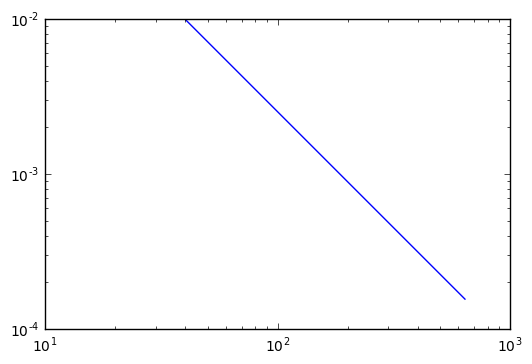

In [6]:
run_test('6 * w^(1/2)', steps)

### sin(w)

integrate sin(w)...
step = 0.1
function data/p_func.csv saved.
num of steps: 20
step = 0.05
function data/p_func.csv saved.
num of steps: 40
step = 0.025
function data/p_func.csv saved.
num of steps: 80
step = 0.0125
function data/p_func.csv saved.
num of steps: 160
step = 0.00625
function data/p_func.csv saved.
num of steps: 320
step = 0.003125
function data/p_func.csv saved.
num of steps: 640
1.41614762423
[1.4161476242329742, 1.416146885733546, 1.4161468396206067, 1.4161468367392234, 1.4161468365591472, 1.416146836547893]
[20, 40, 80, 160, 320, 640]
[7.384994282766399e-07, 4.6112939244835616e-08, 2.8813833541363465e-09, 1.8007617619275607e-10, 1.1254108756020287e-11]


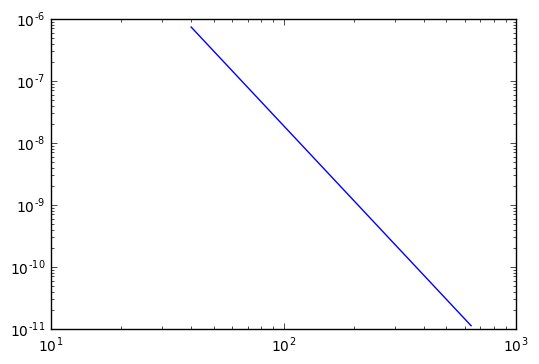

In [7]:
run_test('sin(w)', steps)

### 1 / (w - 1)

integrate <function <lambda> at 0x7f8018766a60>...
step = 0.1
function data/p_func.csv saved.
num of steps: 50
step = 0.05
function data/p_func.csv saved.
num of steps: 100
step = 0.025
function data/p_func.csv saved.
num of steps: 200
step = 0.0125
function data/p_func.csv saved.
num of steps: 400
step = 0.00625
function data/p_func.csv saved.
num of steps: 800
step = 0.003125
function data/p_func.csv saved.
num of steps: 1600
12.4333333333
[12.433333333333334, 12.483333333333333, 12.491666666666667, 12.495833333333334, 12.497916666666667, 12.498958333333333]
[50, 100, 200, 400, 800, 1600]
[0.049999999999998934, 0.008333333333334636, 0.00416666666666643, 0.002083333333333215, 0.0010416666666657193]


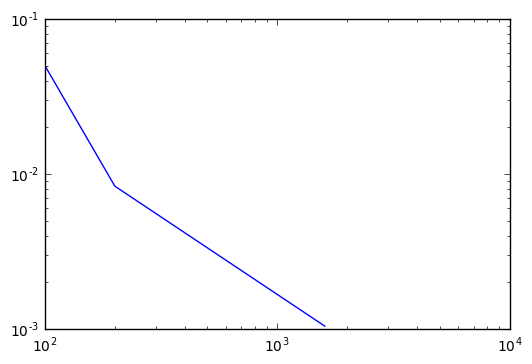

In [9]:
run_test(lambda x: round(x), steps, x1=5)

## Коэффициент наклона прямой показывает степень точности, отступ (значение графика в 0) 